The columns within this catalog are: 
['d_arcsec', 'd_arcsec_2', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', '_2MASS', 'RAJ2000_2', 'DEJ2000_2', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']
The ratio of the error in magnitude to the magnitude itself (using the J band as an illustrative example) is: 
0.00540872155727


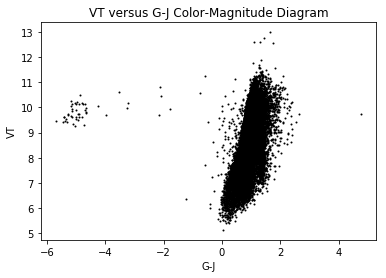

The angular distances (in arcseconds) for stars whose values of G-J are less than -1.8 or greater than 3 (strange outliers) are: 
4.476352
4.800361


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:1096: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)


4.772807
4.99424
4.372184
4.263842
4.762472
4.765442
4.665145
4.87628
4.993663
4.752691
4.982036
4.735433
4.961888
4.897414
4.947789
4.995755
4.58586
4.914973
0.053102
4.919122
4.597764
4.935793
4.917536
4.948541
4.95773
4.857511
4.937467
4.848251
4.78474
4.987092
4.813617
4.742395
4.692373
4.931956
4.904405
4.940503
4.736822
4.765623
4.956913
4.773274
4.877278
4.968732
4.826689
4.619261
4.870291
4.742278


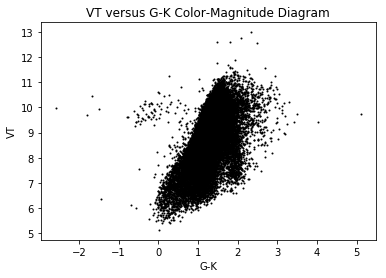

The angular distances (in arcseconds) for stars whose values of G-K are less than -1 or greater than 3.7 (strange outliers) are: 
4.778301
0.053102
4.95773
4.692373
4.51071
4.826689
4.60893


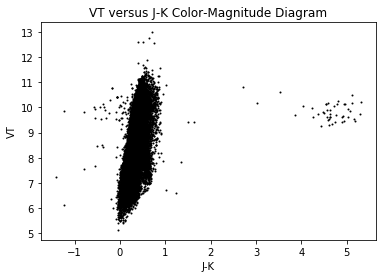

The angular distances (in arcseconds) for stars whose values of J-K are less than -1 or greater than 2 (strange outliers) are: 
4.476352
4.800361
4.772807
4.99424
4.372184
4.263842
4.762472
4.765442
4.665145
4.87628
4.993663
4.752691
4.982036
4.735433
4.961888
4.897414
4.947789
4.995755
4.58586
4.914973
4.919122
4.597764
0.312039
4.935793
4.917536
4.948541
4.857511
4.937467
4.848251
0.201421
4.78474
4.987092
4.813617
4.742395
4.931956
4.904405
4.940503
4.736822
4.765623
4.956913
4.773274
4.877278
3.805542
4.968732
4.619261
4.870291
4.742278


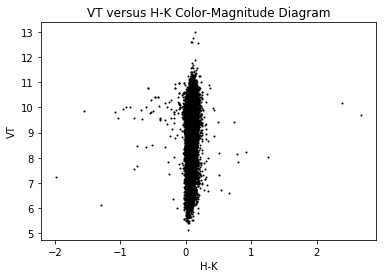

The angular distances (in arcseconds) for stars whose values of H-K are less than -1.15 or greater than 1 (strange outliers) are: 
4.762472
4.58586
0.312039
0.201421
3.805542
1.10328
The spectral types of the stars in this catalog are: 
   SpType   
------------
          K0
      F3/5 V
       G3 IV
        K3 V
       K 5 V
          F5
   A5 III/IV
        G3 V
          G2
        K1 V
         ...
        F8 V
      F2/3 V
          G0
          G5
          G0
G5/8 V + (F)
          F8
          F8
     G2 V(W)
          G0
          F8
Length = 31704 rows


In [34]:
from astropy.table import Table
import matplotlib.pyplot as plt
import math
import numpy
#Imports possibly useful software for Python
t=Table.read('TGAS_d125_Wright03_2Mass.vot')
#Defines t as this table
Jmags=t["Jmag"]
#Defines Jmags from the Jmag array
QFlags=t["Qfl"]
#Defines QFlags from the Qfl array
for i in range(0,len(QFlags)):
    if(QFlags[i][0]==ord("A")):
         Jmags.mask[i]=False
    else:
         Jmags.mask[i]=True
#Mask elements of Jmags that have an undetected quality of detection for J-band
Hmags=t["Hmag"]
#Defines Hmags from the Hmag array
for i in range(0,len(QFlags)):
    if(QFlags[i][0]==ord("A")):
         Hmags.mask[i]=False
    else:
         Hmags.mask[i]=True
#Mask elements of Hmags that have an undetected quality of detection for H-band
Kmags=t["Kmag"]
#Defines Kmags from the Kmag array
for i in range(0,len(QFlags)):
    if(QFlags[i][0]==ord("A")):
         Kmags.mask[i]=False
    else:
         Kmags.mask[i]=True
#Mask elements of Kmags that have an undetected quality of detection for K-band
VTmags=t["VTmag"]
#Defines VTmags from the array VTmag in the table
for i in range(0,len(QFlags)):
    if(QFlags[i][0]==ord("A")):
         VTmags.mask[i]=False
    else:
         VTmags.mask[i]=True
#Mask elements of VTmags that have an undetected quality of detection for VT-band
Gmags=t["__Gmag_"]
#Defines Gmags from the __Gmag_ array
for i in range(0,len(QFlags)):
    if(QFlags[i][0]==ord("A")):
         Gmags.mask[i]=False
    else:
         Gmags.mask[i]=True
#Mask elements of Gmags that have an undetected quality of detection for G-band
print("The columns within this catalog are: ")
print(t.colnames)
#Prints out all of the column names for easy reference
Jerrorcomparison=(numpy.mean(t["e_Jmag"]))/(numpy.mean(t["Jmag"]))
#Finds the ratio of the average J error to the average J magnitude
print("The ratio of the error in magnitude to the magnitude itself (using the J band as an illustrative example) is: ")
print(Jerrorcomparison)
#Prints out this ratio for comparison, where the analogous ratios for H and K are very similar
G_J=Gmags-Jmags
#Defines G-J from the two arrays
plt.xlabel('G-J')
plt.ylabel('VT')
plt.title('VT versus G-J Color-Magnitude Diagram')
plt.plot(G_J,VTmags,'ko',ms=1)
plt.show()
#Makes color-magnitude diagram of VT versus G-J and labels it nicely
print("The angular distances (in arcseconds) for stars whose values of G-J are less than -1.8 or greater than 3 (strange outliers) are: ")
for i in range(0,len(G_J)):
    if(G_J[i]<-1.8 or G_J[i]>3):
        print(t[i]["d_arcsec"])
    else:
        G_J[i]=G_J[i]
#Prints out the angular distance for the stars with unusually low or high values for G-J to look at
G_K=Gmags-Kmags
#Defines G-J from the two arrays
plt.xlabel('G-K')
plt.ylabel('VT')
plt.title('VT versus G-K Color-Magnitude Diagram')
plt.plot(G_K,VTmags,'ko',ms=1)
plt.show()
#Makes color-magnitude diagram of VT versus G-K and labels it nicely
print("The angular distances (in arcseconds) for stars whose values of G-K are less than -1 or greater than 3.7 (strange outliers) are: ")
for i in range(0,len(G_K)):
    if(G_K[i]<-1 or G_K[i]>3.7):
        print(t[i]["d_arcsec"])
    else:
        G_K[i]=G_K[i]
#Prints out the angular distance for the stars with unusually low or high values for G-J to look at
J_K=Jmags-Kmags
#Defines G-J from the two arrays
plt.xlabel('J-K')
plt.ylabel('VT')
plt.title('VT versus J-K Color-Magnitude Diagram')
plt.plot(J_K,VTmags,'ko',ms=1)
plt.show()
#Makes color-magnitude diagram of VT versus J-K and labels it nicely
print("The angular distances (in arcseconds) for stars whose values of J-K are less than -1 or greater than 2 (strange outliers) are: ")
for i in range(0,len(J_K)):
    if(J_K[i]<-1 or J_K[i]>2):
        print(t[i]["d_arcsec"])
    else:
        J_K[i]=J_K[i]
#Prints out the angular distance for the stars with unusually low or high values for J-K to look at
H_K=Hmags-Kmags
#Defines G-J from the two arrays
plt.xlabel('H-K')
plt.ylabel('VT')
plt.title('VT versus H-K Color-Magnitude Diagram')
plt.plot(H_K,VTmags,'ko',ms=1)
plt.show()
#Makes color-magnitude diagram of VT versus G-J and labels it nicely
print("The angular distances (in arcseconds) for stars whose values of H-K are less than -1.15 or greater than 1 (strange outliers) are: ")
for i in range(0,len(H_K)):
    if(H_K[i]<-1.15 or H_K[i]>1):
        print(t[i]["d_arcsec"])
    else:
        H_K[i]=H_K[i]
#Prints out the angular distance for the stars with unusually low or high values for H-K to look at
print("The spectral types of the stars in this catalog are: ")
print(t["SpType"])
#Prints out the spectral types of the stars